### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The 
company wants to know 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether 
  to invest in them or not.
* Determine the optimal value of lambda for ridge and lasso regression.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### Assumptions
1. Linear relationship between independant(X) and target variable(Y)
2. Error terms are normally distributed (not X, Y)
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',400)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
folder_path="C:\\Users\\hp\Desktop\\MyLearning\\Final Assignment\Advanced Regression Assignment\\"

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(folder_path+"train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2: Data Cleaning 

In [8]:
#drop null rows
df=df.dropna(how="all")

In [9]:
#drop duplicate values
df=df.drop_duplicates()

In [10]:
# replace NA with None in the following columns below:

for col in df.select_dtypes(include=["object"]):
    df[col]=df[col].fillna("None")

Remove columns which are more than 80 % skewed i.e. more than 80% data associated with one value


In [11]:
def RemoveHighlySkewedColumns():
    column = []
    for col in (df.columns):
        if(df[col].value_counts().max() >= round(len(df)*80/100,2)):
            column.append(col)
    return column

columnsToBeRemoved = RemoveHighlySkewedColumns()
print(columnsToBeRemoved)
print(len(columnsToBeRemoved))
# Remove the columns with skewed data
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']
33


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,65.00,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.00,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003.00,RFn,2,548,0,61,2,2008,208500
1,2,20,RL,80.00,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.00,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.00,RFn,2,460,298,0,5,2007,181500
2,3,60,RL,68.00,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.00,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.00,RFn,2,608,0,42,9,2008,223500
3,4,70,RL,60.00,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.00,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.00,Unf,3,642,0,35,2,2006,140000
4,5,60,RL,84.00,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.00,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.00,RFn,3,836,192,84,12,2008,250000


In [12]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [13]:
# check the null values in the numerical data
nullNumericCol=df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].index

In [14]:
df[list(nullNumericCol)].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.00,1452.00,1379.00
mean,70.05,103.69,1978.51
std,24.28,181.07,24.69
min,21.00,0.00,1900.00
25%,59.00,0.00,1961.00
50%,69.00,0.00,1980.00
75%,80.00,166.00,2002.00
max,313.00,1600.00,2010.00


In [15]:
nullNumericCol

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [16]:
#median value of MasVnrArea removing 0
df[df['MasVnrArea']!=0]['MasVnrArea'].median()

203.0

In [17]:
#Impute the null values with median values for ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

df['LotFrontage']=df['LotFrontage'].replace(np.nan,df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan,df[df['MasVnrArea']!=0]['MasVnrArea'].median())


In [18]:
# setting the null values with 0 for GarageYrBlt

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [19]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,IsRemodelled
0,1,60,RL,65.00,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.00,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,2,2008,208500,0
1,2,20,RL,80.00,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.00,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,5,2007,181500,0
2,3,60,RL,68.00,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.00,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,9,2008,223500,1
3,4,70,RL,60.00,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.00,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,2,2006,140000,1
4,5,60,RL,84.00,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.00,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,12,2008,250000,0


In [20]:
# Create a new column named getBuiltAge and determine the age of the building at the time of selling

def getBuiltAge(row):
        return row['YrSold'] - row['YearBuilt']
    
       
df['BuiltAge'] = df.apply(getBuiltAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,IsRemodelled,BuiltAge
0,1,60,RL,65.00,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.00,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,2,2008,208500,0,5
1,2,20,RL,80.00,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.00,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,5,2007,181500,0,31
2,3,60,RL,68.00,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.00,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,9,2008,223500,1,7
3,4,70,RL,60.00,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.00,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,2,2006,140000,1,91
4,5,60,RL,84.00,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.00,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,12,2008,250000,0,8


In [21]:
# Create a new column which would indicate the age of garage at th etime of selling
def getGarageAge(row):
    if row['GarageYrBlt'] == 0:
        return 0
    else:
        return row['YrSold'] - row['GarageYrBlt']
    
df['GarageAge'] = df.apply(getGarageAge, axis=1)
df.sample(n=5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,IsRemodelled,BuiltAge,GarageAge
1178,1179,50,RL,54.00,7681,IR1,FR2,Crawfor,1.5Fin,5,6,1921,1950,Gable,Wd Sdng,Wd Sdng,None,0.00,TA,BrkTil,TA,No,Unf,0,731,731,Ex,820,523,1343,0,1,1,3,TA,7,1,Gd,Detchd,1921,Unf,1,186,192,0,7,2009,154900,1,88,88
1220,1221,20,RL,66.00,7800,IR1,Inside,NAmes,1Story,5,5,1964,1964,Gable,Wd Sdng,Wd Sdng,None,0.00,TA,CBlock,TA,No,Rec,312,0,912,TA,912,0,912,0,1,0,2,TA,5,0,None,Attchd,1964,Unf,1,288,0,0,11,2006,115000,0,42,42
16,17,20,RL,69.00,11241,IR1,CulDSac,NAmes,1Story,6,7,1970,1970,Gable,Wd Sdng,Wd Sdng,BrkFace,180.00,TA,CBlock,TA,No,ALQ,578,426,1004,Ex,1004,0,1004,1,1,0,2,TA,5,1,TA,Attchd,1970,Fin,2,480,0,0,3,2010,149000,0,40,40
993,994,60,RL,68.00,8846,Reg,Inside,CollgCr,2Story,6,5,2005,2006,Gable,VinylSd,VinylSd,None,0.00,TA,PConc,Gd,No,Unf,0,750,750,Ex,750,750,1500,0,2,1,3,Gd,6,0,None,Attchd,2005,RFn,2,564,0,35,8,2006,173900,1,1,1
359,360,60,RL,78.00,12011,IR1,CulDSac,NoRidge,2Story,8,5,1998,1998,Gable,VinylSd,VinylSd,BrkFace,530.00,Gd,PConc,Gd,Av,GLQ,956,130,1086,Ex,1086,838,1924,1,2,1,3,Gd,7,1,TA,Attchd,1998,RFn,2,592,208,75,6,2006,280000,0,8,8


In [22]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [23]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Id             0.00
MSSubClass     0.00
MSZoning       0.00
LotFrontage    0.00
LotArea        0.00
LotShape       0.00
LotConfig      0.00
Neighborhood   0.00
HouseStyle     0.00
OverallQual    0.00
OverallCond    0.00
RoofStyle      0.00
Exterior1st    0.00
Exterior2nd    0.00
MasVnrType     0.00
MasVnrArea     0.00
ExterQual      0.00
Foundation     0.00
BsmtQual       0.00
BsmtExposure   0.00
BsmtFinType1   0.00
BsmtFinSF1     0.00
BsmtUnfSF      0.00
TotalBsmtSF    0.00
HeatingQC      0.00
1stFlrSF       0.00
2ndFlrSF       0.00
GrLivArea      0.00
BsmtFullBath   0.00
FullBath       0.00
HalfBath       0.00
BedroomAbvGr   0.00
KitchenQual    0.00
TotRmsAbvGrd   0.00
Fireplaces     0.00
FireplaceQu    0.00
GarageType     0.00
GarageFinish   0.00
GarageCars     0.00
GarageArea     0.00
WoodDeckSF     0.00
OpenPorchSF    0.00
MoSold         0.00
SalePrice      0.00
IsRemodelled   0.00
BuiltAge       0.00
GarageAge      0.00
dtype: float64


In [24]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.98,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,BuiltAge,GarageAge
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,69.86,10516.83,6.10,5.58,104.23,443.64,567.24,1057.43,1162.63,346.99,1515.46,0.43,1.57,0.38,2.87,6.52,0.61,1.77,472.98,94.24,46.66,6.32,180921.20,0.48,36.55,27.68
std,421.61,42.30,22.03,9981.26,1.38,1.11,180.72,456.10,441.87,438.71,386.59,436.53,525.48,0.52,0.55,0.50,0.82,1.63,0.64,0.75,213.80,125.34,66.26,2.70,79442.50,0.50,30.25,24.95
min,1.00,20.00,21.00,1300.00,1.00,1.00,0.00,0.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,34900.00,0.00,0.00,0.00
25%,365.75,20.00,60.00,7553.50,5.00,5.00,0.00,0.00,223.00,795.75,882.00,0.00,1129.50,0.00,1.00,0.00,2.00,5.00,0.00,1.00,334.50,0.00,0.00,5.00,129975.00,0.00,8.00,4.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,0.00,383.50,477.50,991.50,1087.00,0.00,1464.00,0.00,2.00,0.00,3.00,6.00,1.00,2.00,480.00,0.00,25.00,6.00,163000.00,0.00,35.00,23.50
75%,1095.25,70.00,79.00,11601.50,7.00,6.00,168.00,712.25,808.00,1298.25,1391.25,728.00,1776.75,1.00,2.00,1.00,3.00,7.00,1.00,2.00,576.00,168.00,68.00,8.00,214000.00,1.00,54.00,46.00
90%,1314.10,120.00,92.00,14381.70,8.00,7.00,335.00,1065.50,1232.00,1602.20,1680.00,954.20,2158.30,1.00,2.00,1.00,4.00,9.00,1.00,3.00,757.10,262.00,130.00,10.00,278000.00,1.00,84.00,61.00
95%,1387.05,160.00,104.00,17401.15,8.00,8.00,456.00,1274.00,1468.00,1753.00,1831.25,1141.05,2466.10,1.00,2.00,1.00,4.00,10.00,2.00,3.00,850.10,335.00,175.05,11.00,326100.00,1.00,91.00,78.00
98%,1430.82,188.20,120.82,25251.62,9.00,8.00,650.82,1442.64,1678.20,2001.64,2072.28,1318.56,2782.38,1.00,3.00,1.00,4.00,10.82,2.00,3.00,907.46,430.10,240.82,12.00,394931.06,1.00,100.00,87.00


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

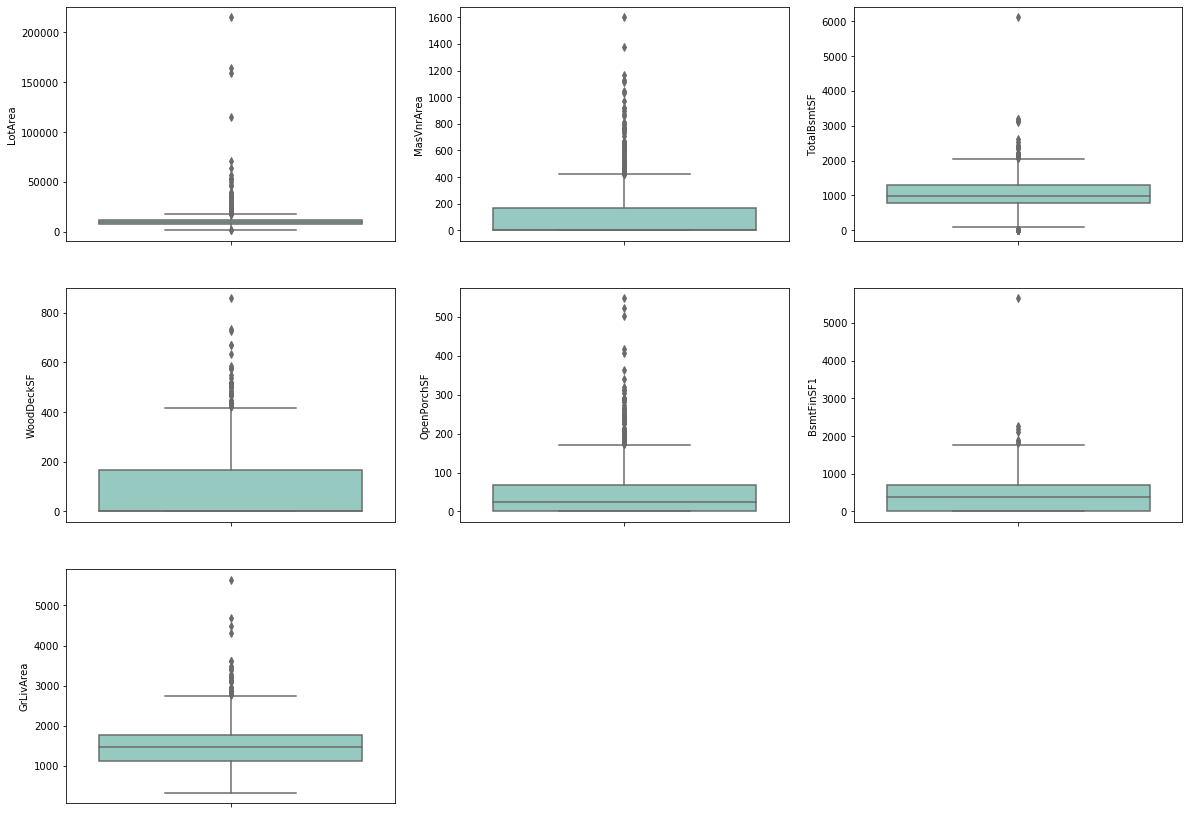

In [25]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3',data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'BsmtFinSF1', palette='Set3', data = df)
plt.subplot(5,3,7)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = df)
plt.show()

In [26]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [27]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)

94.93


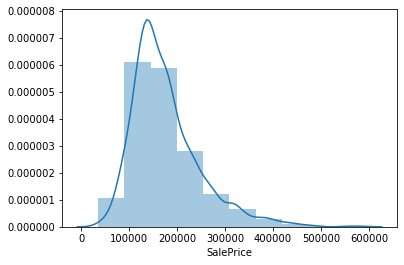

In [28]:
#visualizing target variable

sns.distplot(df['SalePrice'],bins=10)
plt.show()

In [29]:
df['SalePrice'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count     1386.00
mean    176342.76
std      71642.77
min      35311.00
25%     129000.00
50%     160000.00
75%     207500.00
90%     270500.00
95%     318045.75
99%     412919.70
max     582933.00
Name: SalePrice, dtype: float64

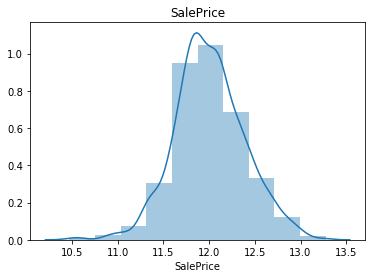

In [30]:
# to many outliers in target variable
# let's transform it using lof transformation

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

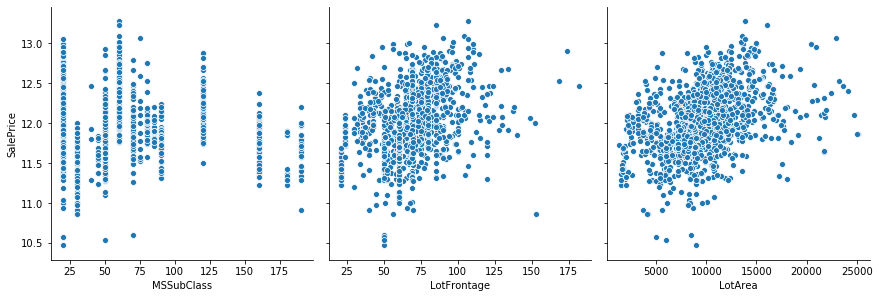

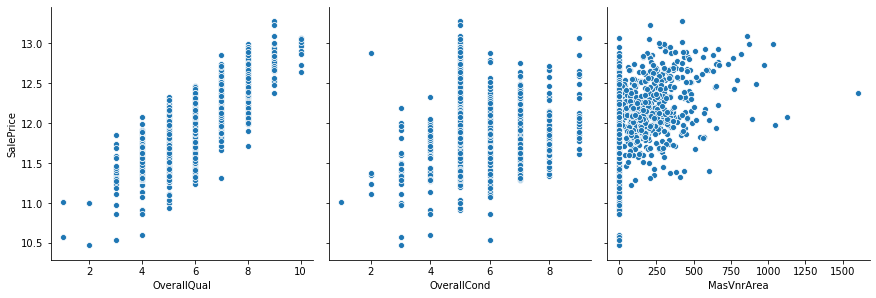

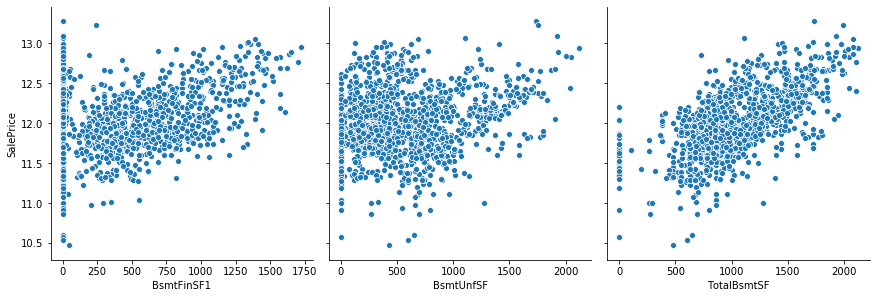

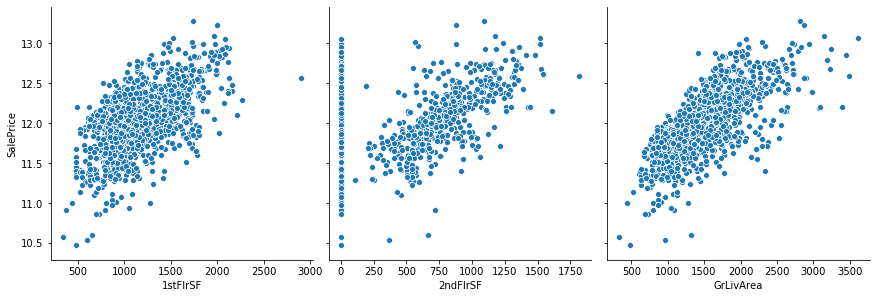

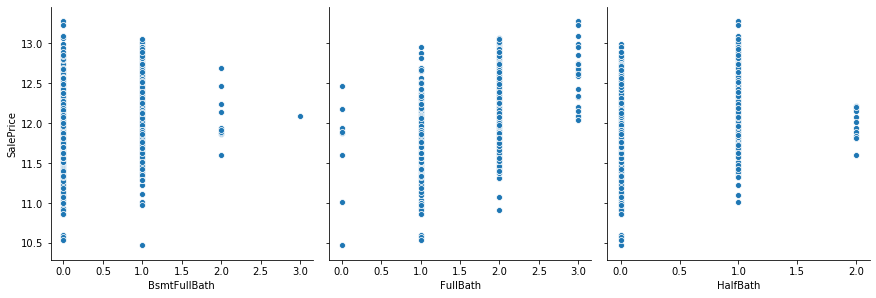

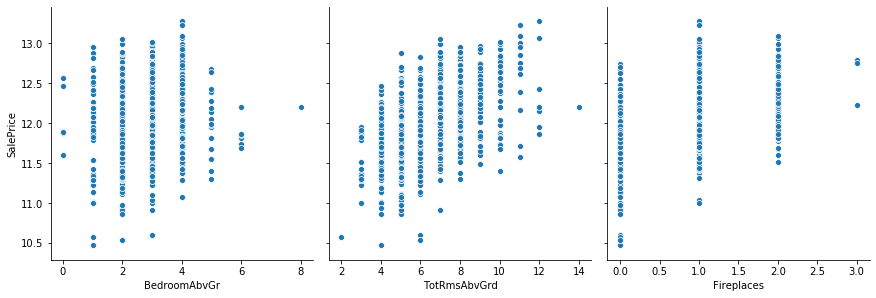

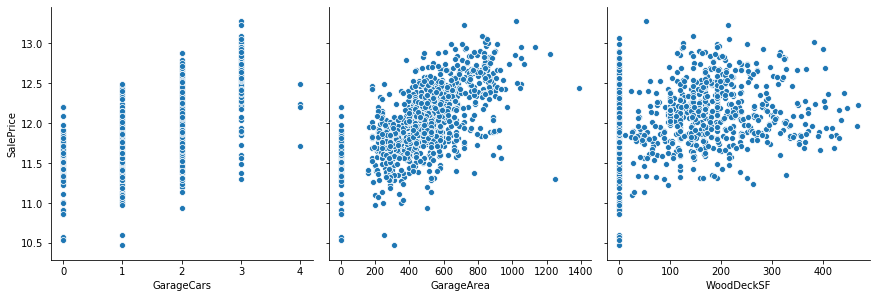

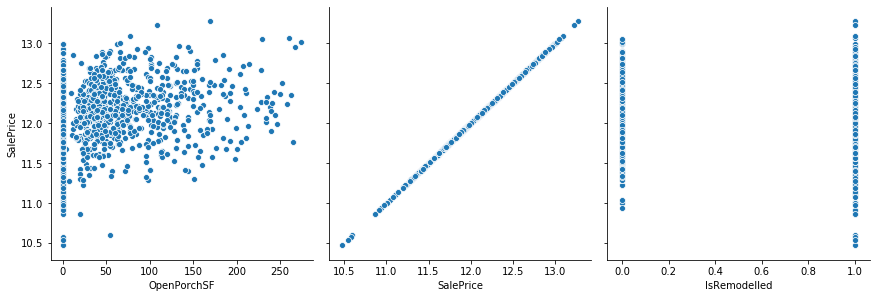

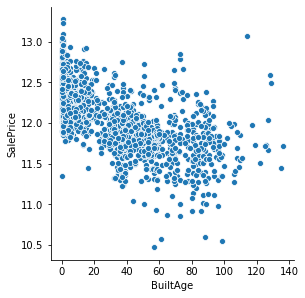

In [31]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BuiltAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

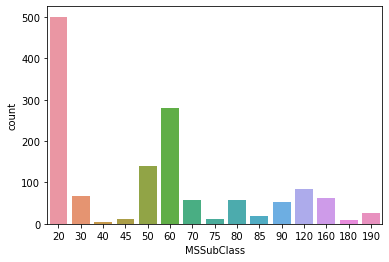

In [32]:
sns.countplot(df.MSSubClass)

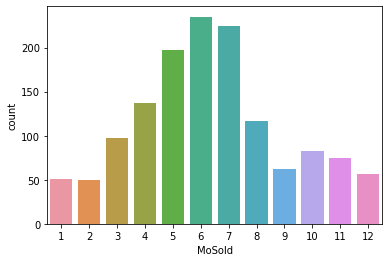

In [33]:
sns.countplot(df.MoSold)

In [34]:
Price_by_MoSold = df.groupby(['MoSold']).agg({'SalePrice': 'sum'})
Price_by_MoSold.sort_values('MoSold',ascending=False).head(10)

,SalePrice
MoSold,
12,687.55
11,906.04
10,996.75
9,749.82
8,1409.07
7,2702.84
6,2819.45
5,2358.57
4,1637.75


In [35]:
def boxplotme(col,scale):
    plt.figure(num=None, figsize=(19,6), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.boxplot(y=df['SalePrice'], x=df[col])
    mybox1 = ax.artists[0]
    mybox2 = ax.artists[1]
    mybox1.set_facecolor('green')
    mybox2.set_facecolor('red')
    plt.yscale(scale)
    return plt.show()

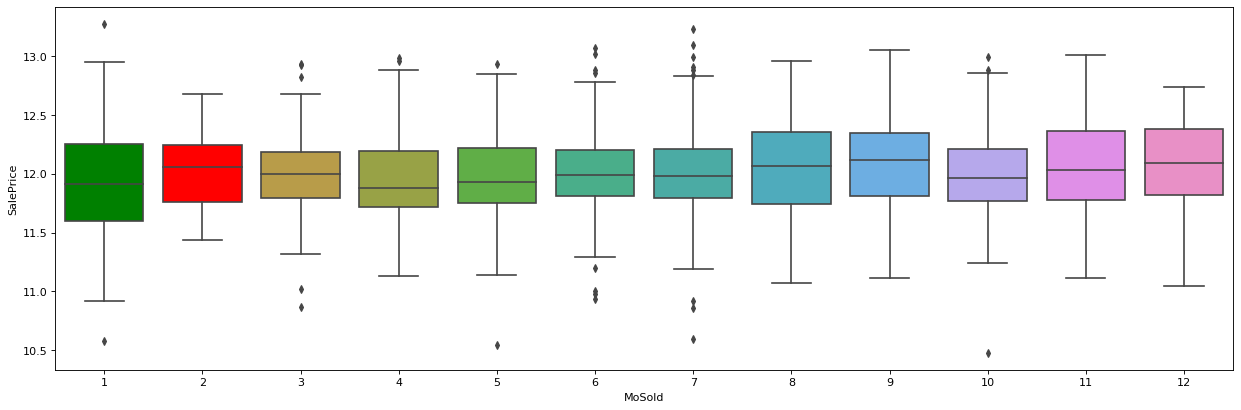

In [36]:
boxplotme('MoSold','linear')

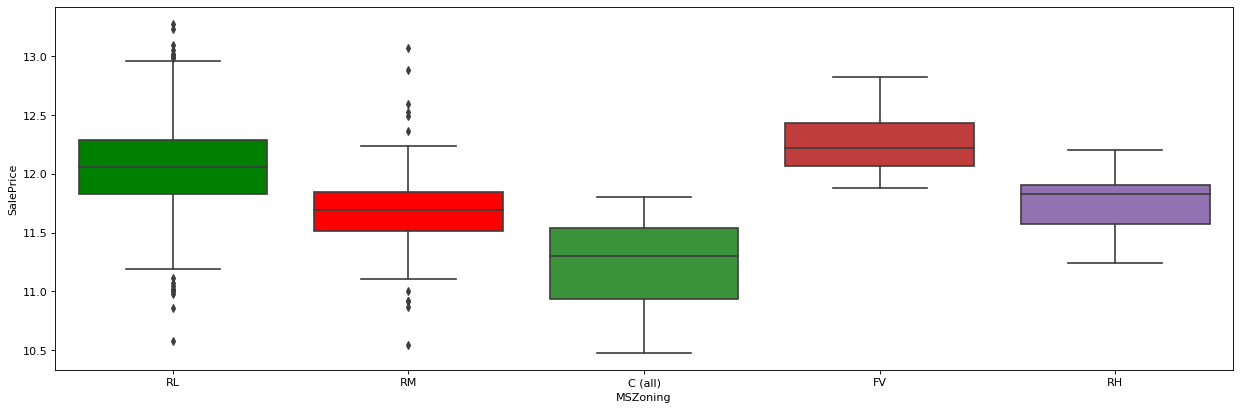

In [37]:
boxplotme('MSZoning','linear')

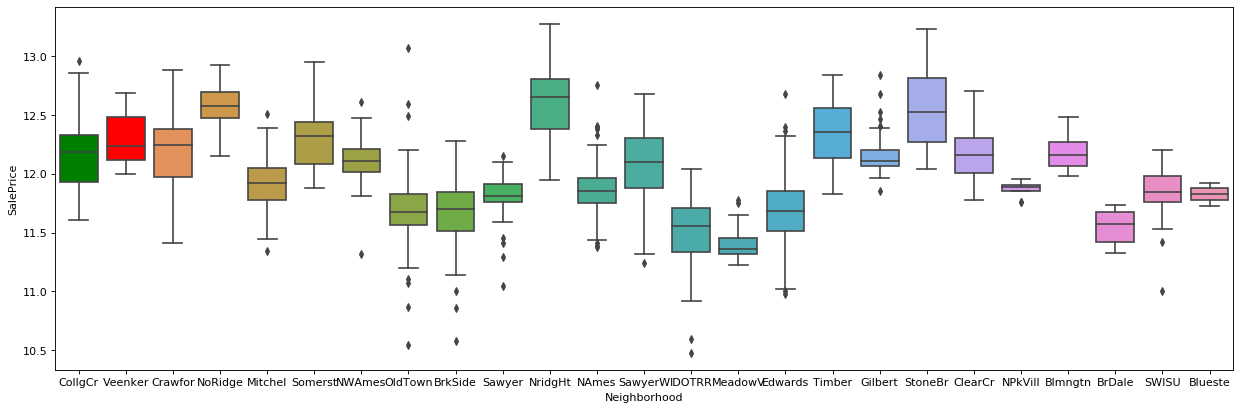

In [38]:
boxplotme('Neighborhood','linear')

There is variation based on Neighborhood. i.e.d NridgHt and StoneBr looks more costly than other neighbourhood.

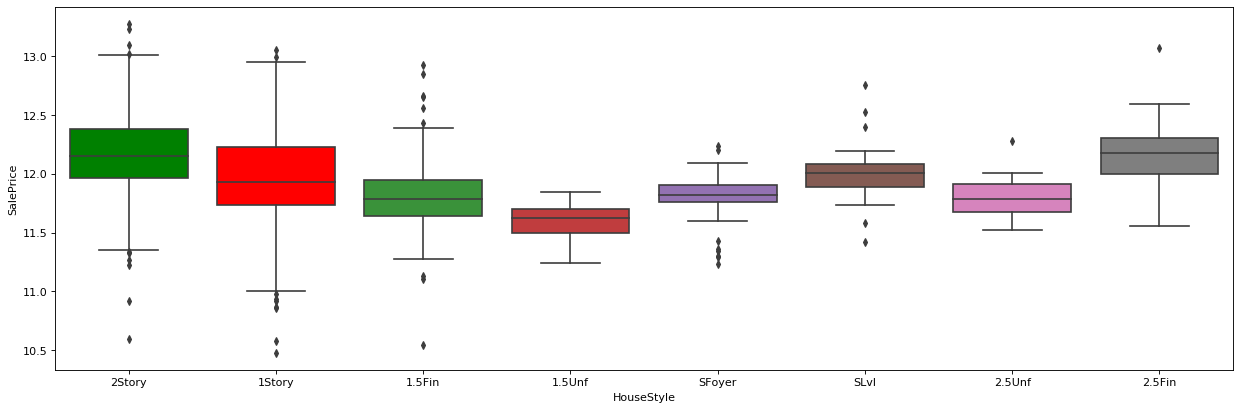

In [39]:
boxplotme('HouseStyle','linear')

 2Story  HouseStyle Costs more than compared to others HouseStyle

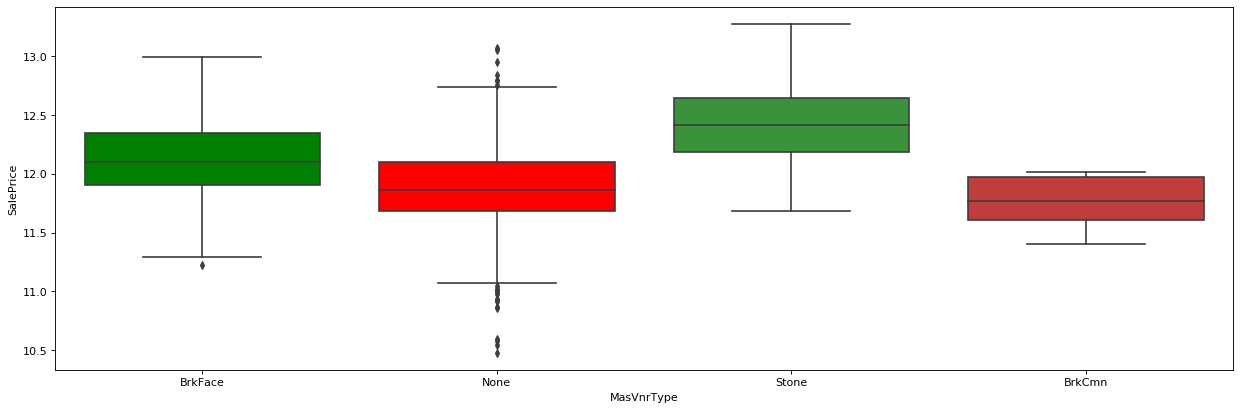

In [40]:
boxplotme('MasVnrType','linear')

<Figure size 1440x1200 with 0 Axes>

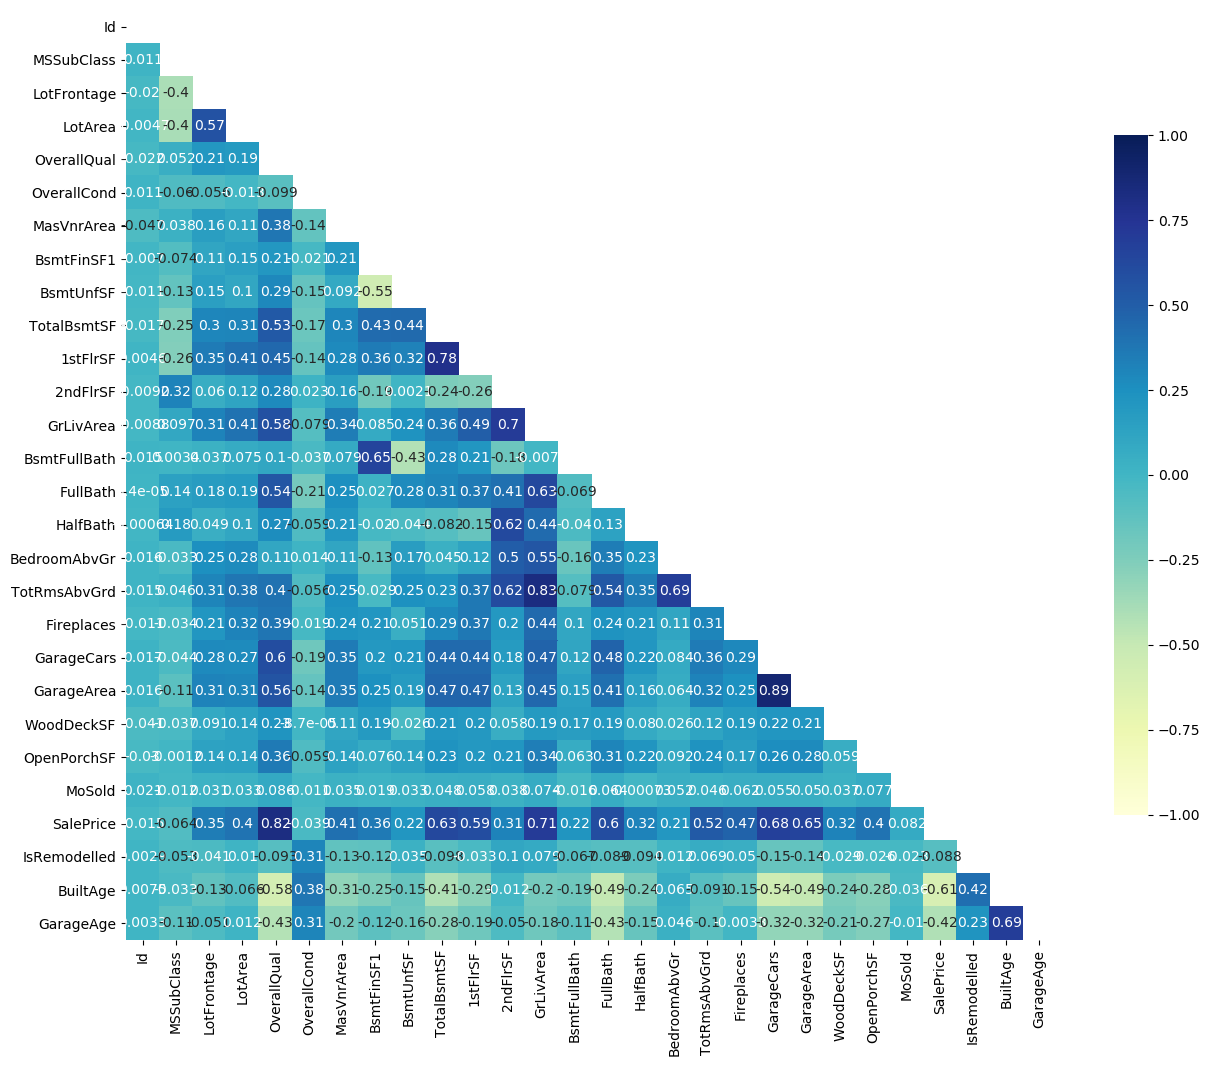

In [41]:
numeric_vars= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = df[numeric_vars].corr()
mask1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .6}, vmin= -1, vmax=1, center=0,
           mask=mask1, square=True,  annot=True)

In [42]:
df=df.drop(['GarageCars','TotRmsAbvGrd','2ndFlrSF','1stFlrSF'],axis=1)

<Figure size 1440x1200 with 0 Axes>

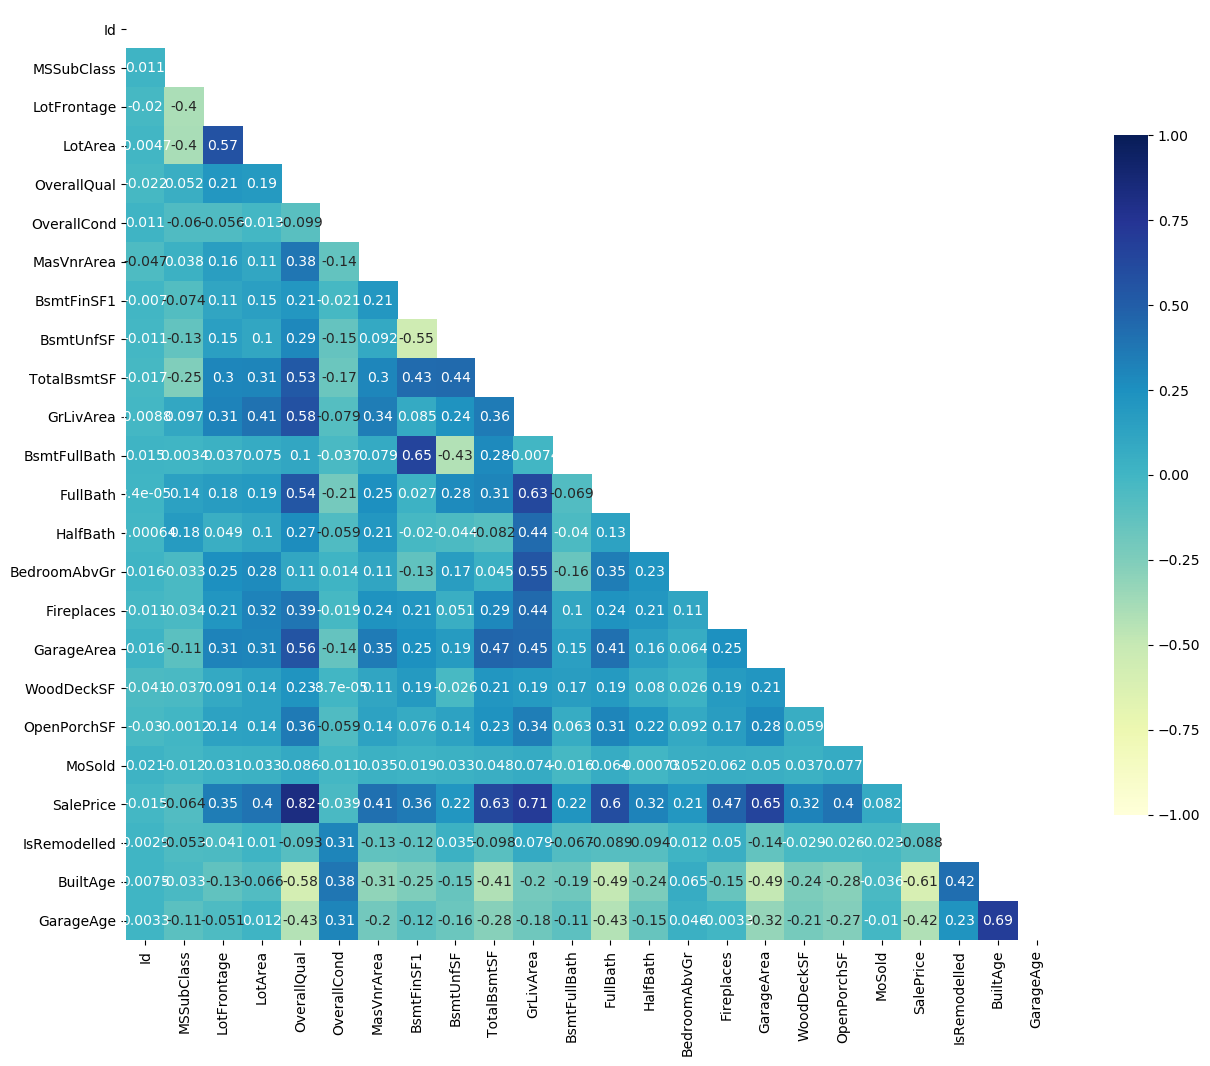

In [43]:
numeric_vars= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = df[numeric_vars].corr()
mask1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .6}, vmin= -1, vmax=1, center=0,
           mask=mask1, square=True,  annot=True)

## Step 4: Data Preparation

  - Converting categorical data into numercal data 
  - Creating Dummies

In [44]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

In [45]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,BuiltAge,GarageAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish
0,1,60,RL,65.00,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.00,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,1710,1,2,1,3,Gd,0,None,Attchd,RFn,548,0,61,2,12.25,0,5,5,3,4,4,1,6,5,4,0,2
1,2,20,RL,80.00,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.00,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,2,0,3,TA,1,TA,Attchd,RFn,460,298,0,5,12.11,0,31,31,3,3,4,4,5,5,3,3,2
2,3,60,RL,68.00,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.00,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,608,0,42,9,12.32,1,7,7,2,4,4,2,6,5,4,3,2
3,4,70,RL,60.00,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.00,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,642,0,35,2,11.85,1,91,8,2,3,3,1,5,4,4,4,1
4,5,60,RL,84.00,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.00,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,836,192,84,12,12.43,0,8,8,2,4,4,3,6,5,4,3,2


In [46]:
df['MasVnrType'].value_counts()

None       831
BrkFace    422
Stone      120
BrkCmn      13
Name: MasVnrType, dtype: int64

In [47]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df = df.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,BuiltAge,GarageAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish
0,60,RL,65.00,8450,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.00,PConc,706,150,856,1710,1,2,1,3,0,Attchd,548,0,61,2,12.25,0,5,5,3,4,4,1,6,5,4,0,2
1,20,RL,80.00,9600,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.00,CBlock,978,284,1262,1262,0,2,0,3,1,Attchd,460,298,0,5,12.11,0,31,31,3,3,4,4,5,5,3,3,2
2,60,RL,68.00,11250,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.00,PConc,486,434,920,1786,1,2,1,3,1,Attchd,608,0,42,9,12.32,1,7,7,2,4,4,2,6,5,4,3,2
3,70,RL,60.00,9550,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.00,BrkTil,216,540,756,1717,1,1,0,3,1,Detchd,642,0,35,2,11.85,1,91,8,2,3,3,1,5,4,4,4,1
4,60,RL,84.00,14260,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.00,PConc,655,490,1145,2198,1,2,1,4,1,Attchd,836,192,84,12,12.43,0,8,8,2,4,4,3,6,5,4,3,2


In [48]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,BuiltAge,GarageAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrTyp_BrkFace,MasVnrTyp_None,MasVnrTyp_Stone
0,60,RL,65.00,8450,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.00,PConc,706,150,856,1710,1,2,1,3,0,Attchd,548,0,61,2,12.25,0,5,5,3,4,4,1,6,5,4,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.00,9600,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.00,CBlock,978,284,1262,1262,0,2,0,3,1,Attchd,460,298,0,5,12.11,0,31,31,3,3,4,4,5,5,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.00,11250,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.00,PConc,486,434,920,1786,1,2,1,3,1,Attchd,608,0,42,9,12.32,1,7,7,2,4,4,2,6,5,4,3,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.00,9550,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.00,BrkTil,216,540,756,1717,1,1,0,3,1,Detchd,642,0,35,2,11.85,1,91,8,2,3,3,1,5,4,4,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60,RL,84.00,14260,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.00,PConc,655,490,1145,2198,1,2,1,4,1,Attchd,836,192,84,12,12.43,0,8,8,2,4,4,3,6,5,4,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [49]:
# drop the below columns as we now have new columns derived from these columns

df = df.drop(['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType',  'HouseStyle',  
                                'LotConfig', 'MasVnrType',], axis=1)

df.drop(['MoSold'], axis = 1, inplace = True)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 131 entries, LotFrontage to MasVnrTyp_Stone
dtypes: float64(3), int64(27), uint8(101)
memory usage: 512.4 KB


In [51]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltAge,GarageAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrTyp_BrkFace,MasVnrTyp_None,MasVnrTyp_Stone
0,65.00,8450,7,5,196.00,706,150,856,1710,1,2,1,3,0,548,0,61,12.25,0,5,5,3,4,4,1,6,5,4,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,80.00,9600,6,8,0.00,978,284,1262,1262,0,2,0,3,1,460,298,0,12.11,0,31,31,3,3,4,4,5,5,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,68.00,11250,7,5,162.00,486,434,920,1786,1,2,1,3,1,608,0,42,12.32,1,7,7,2,4,4,2,6,5,4,3,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,60.00,9550,7,5,0.00,216,540,756,1717,1,1,0,3,1,642,0,35,11.85,1,91,8,2,3,3,1,5,4,4,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,84.00,14260,8,5,350.00,655,490,1145,2198,1,2,1,4,1,836,192,84,12.43,0,8,8,2,4,4,3,6,5,4,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [52]:
df_q3=df.copy()

# Train Test Split

In [53]:
X=df.drop(['SalePrice'],axis=1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,IsRemodelled,BuiltAge,GarageAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrTyp_BrkFace,MasVnrTyp_None,MasVnrTyp_Stone
0,65.00,8450,7,5,196.00,706,150,856,1710,1,2,1,3,0,548,0,61,0,5,5,3,4,4,1,6,5,4,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,80.00,9600,6,8,0.00,978,284,1262,1262,0,2,0,3,1,460,298,0,0,31,31,3,3,4,4,5,5,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,68.00,11250,7,5,162.00,486,434,920,1786,1,2,1,3,1,608,0,42,1,7,7,2,4,4,2,6,5,4,3,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,60.00,9550,7,5,0.00,216,540,756,1717,1,1,0,3,1,642,0,35,1,91,8,2,3,3,1,5,4,4,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,84.00,14260,8,5,350.00,655,490,1145,2198,1,2,1,4,1,836,192,84,0,8,8,2,4,4,3,6,5,4,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [54]:
y=df['SalePrice']
y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

Scaling the feature

In [60]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,IsRemodelled,BuiltAge,GarageAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrTyp_BrkFace,MasVnrTyp_None,MasVnrTyp_Stone
0,-0.21,-0.28,0.70,-0.52,0.60,0.68,-0.95,-0.44,0.48,1.15,0.83,1.23,0.18,-0.94,0.39,-0.78,0.34,-0.95,-1.04,-0.90,0.69,1.10,0.60,-0.57,1.18,0.89,0.76,-0.98,0.34,-0.22,-0.11,0.52,-0.42,-0.04,-0.11,-0.20,-0.11,2.88,-0.19,-0.27,-0.24,-0.16,-0.10,-0.18,-0.43,-0.08,-0.23,-0.15,-0.23,-0.29,-0.14,-0.23,-0.21,-0.26,-0.13,-0.15,-0.09,0.51,-0.09,-0.48,-0.07,-0.04,-0.03,-0.04,-0.18,-0.03,-0.21,-0.42,-0.03,-0.43,-0.28,-0.04,-0.13,1.32,-0.39,-0.14,-0.05,-0.07,-0.13,-0.03,-0.21,-0.41,-0.08,-0.42,-0.03,-0.32,-0.05,-0.13,1.35,-0.39,-0.16,-0.87,1.12,-0.13,-0.06,-0.05,0.84,-0.12,-0.25,-0.08,-0.61,-0.25,-0.23,-0.05,-0.09,-0.34,1.98,-0.21,-0.09,-0.21,-0.12,-0.20,-0.25,-0.22,-0.09,-0.14,-0.25,-0.18,-0.05,0.61,-0.10,-0.99,-0.08,-0.08,1.51,-0.17,-0.22,1.51,-1.22,-0.31
1,0.56,0.03,-0.05,2.17,-0.59,1.33,-0.64,0.61,-0.46,-0.80,0.83,-0.76,0.18,0.66,-0.03,1.95,-0.75,-0.95,-0.18,0.14,0.69,-0.68,0.60,2.34,0.70,0.89,-0.76,0.68,0.34,-0.22,-0.11,0.52,-0.42,-0.04,-0.11,-0.20,-0.11,-0.35,-0.19,-0.27,-0.24,-0.16,-0.10,-0.18,-0.43,-0.08,-0.23,-0.15,-0.23,-0.29,-0.14,-0.23,-0.21,-0.26,-0.13,-0.15,11.73,0.51,-0.09,-0.48,-0.07,-0.04,-0.03,-0.04,-0.18,-0.03,-0.21,-0.42,-0.03,2.33,-0.28,-0.04,-0.13,-0.75,-0.39,-0.14,-0.05,-0.07,-0.13,-0.03,-0.21,-0.41,-0.08,2.37,-0.03,-0.32,-0.05,-0.13,-0.74,-0.39,-0.16,1.14,-0.89,-0.13,-0.06,-0.05,0.84,-0.12,-0.25,-0.08,-0.61,-0.25,-0.23,-0.05,-0.09,-0.34,-0.50,-0.21,-0.09,-0.21,-0.12,-0.20,-0.25,-0.22,-0.09,-0.14,-0.25,5.52,-0.05,-1.63,-0.10,1.01,-0.08,-0.08,-0.66,-0.17,-0.22,-0.66,0.82,-0.31
2,-0.05,0.49,0.70,-0.52,0.39,0.15,-0.30,-0.28,0.64,1.15,0.83,1.23,0.18,0.66,0.68,-0.78,-0.00,1.05,-0.97,-0.82,-1.08,1.10,0.60,0.40,1.18,0.89,0.76,0.68,0.34,-0.22,-0.11,0.52,-0.42,-0.04,-0.11,-0.20,-0.11,2.88,-0.19,-0.27,-0.24,-0.16,-0.10,-0.18,-0.43,-0.08,-0.23,-0.15,-0.23,-0.29,-0.14,-0.23,-0.21,-0.26,-0.13,-0.15,-0.09,0.51,-

In [62]:
# split into train and test

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

## Step 5: Recursive feature elimination (RFE)

    Since there are around 131 features, we will use RFE to get the best 50 features out of the 131 features and use the new
    features for further analysis

In [63]:
import sklearn
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()
lm.fit(X_train,y_train)

#running RFE

rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)

In [65]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtUnfSF,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,HalfBath,True,1
9,GarageArea,True,1


In [66]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [67]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

In [72]:
# list pf alphas

params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,15,16,17, 18,19,20,21,22,23,50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 37 candidates, totalling 185 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 11, 12, 13, 15, 16, 17,
                                   18, 19, 20, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,15,-0.08,-0.08,1
23,13,-0.08,-0.08,2
25,16,-0.08,-0.08,3
26,17,-0.08,-0.08,4
22,12,-0.08,-0.08,5
27,18,-0.08,-0.08,6
28,19,-0.08,-0.08,7
21,11,-0.08,-0.08,8
29,20,-0.08,-0.08,9
20,10.00,-0.08,-0.08,10


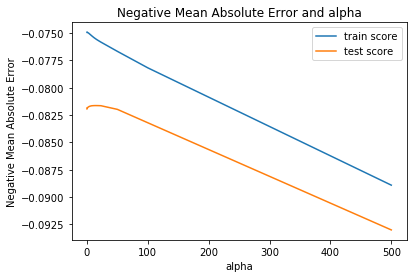

In [74]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=15)

In [76]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01260726,  0.02308412,  0.07172777,  0.04822779, -0.02680084,
        0.07696576,  0.10879929,  0.01100118,  0.01618624,  0.02697923,
        0.01174195, -0.06312283, -0.01441497,  0.00913899,  0.01355318,
        0.01918913,  0.01785288,  0.05064716,  0.01456252,  0.06671948,
        0.0420426 ,  0.0172211 ,  0.02997917,  0.01315774,  0.01588183,
       -0.02784456,  0.01785272, -0.00121846, -0.01898851, -0.01464865,
       -0.01161195,  0.00991494, -0.00121846,  0.02086403,  0.01031425,
        0.01761133,  0.01176569,  0.0259467 ,  0.03896521,  0.02041007,
        0.02804325, -0.01106563, -0.00677284, -0.00810714, -0.02252484,
        0.01493047,  0.01290342,  0.01451792,  0.00789922,  0.01967329])

In [77]:
ridge.intercept_

12.006272254316292

Text(0.5, 0, 'Errors')

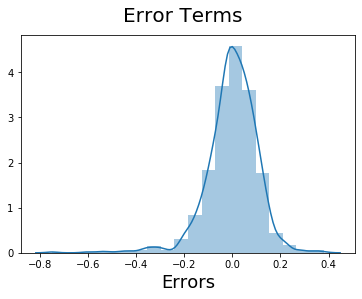

In [78]:
y_pred_train_ridge = ridge.predict(X_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train_ridge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [79]:
# Making predictions
y_pred_test_ridge = ridge.predict(X_test)

In [80]:
# Check the mean squared error
mean_squared_error(y_test,y_pred_test_ridge)

0.013526502819930104

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train_ridge = sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print('Model RMSE:',rmse_train_ridge)

rmse_test_ridge = sqrt(mean_squared_error(y_test, y_pred_test_ridge))
print('Model RMSE:',rmse_test_ridge)

from sklearn.metrics import r2_score
r2_train_ridge=r2_score(y_train, y_pred_train_ridge)
print('Model Train r2_score:',r2_train_ridge)

from sklearn.metrics import r2_score
r2_test_ridge=r2_score(y_test, y_pred_test_ridge)
print('Model Test r2_score:',r2_test_ridge)

Model RMSE: 0.10635317892279846
Model RMSE: 0.1163034944441916
Model Train r2_score: 0.9234075008261411
Model Test r2_score: 0.9081550431023356


In [82]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sample(n=10)

,Features,Coefficient
28,Exterior1st_CemntBd,-0.02
11,BuiltAge,-0.06
10,WoodDeckSF,0.01
41,MSSubClass_30,-0.01
2,OverallQual,0.07
27,Exterior1st_CBlock,-0.00
38,GarageType_Attchd,0.04
31,Exterior2nd_Brk Cmn,0.01
22,Neighborhood_Crawfor,0.03
4,BsmtUnfSF,-0.03


In [83]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0126,
 'LotArea': 0.0231,
 'OverallQual': 0.0717,
 'OverallCond': 0.0482,
 'BsmtUnfSF': -0.0268,
 'TotalBsmtSF': 0.077,
 'GrLivArea': 0.1088,
 'BsmtFullBath': 0.011,
 'HalfBath': 0.0162,
 'GarageArea': 0.027,
 'WoodDeckSF': 0.0117,
 'BuiltAge': -0.0631,
 'GarageAge': -0.0144,
 'd_BsmtExposure': 0.0091,
 'd_HeatingQC': 0.0136,
 'd_KitchenQual': 0.0192,
 'd_FireplaceQu': 0.0179,
 'MSZoning_FV': 0.0506,
 'MSZoning_RH': 0.0146,
 'MSZoning_RL': 0.0667,
 'MSZoning_RM': 0.042,
 'Neighborhood_BrkSide': 0.0172,
 'Neighborhood_Crawfor': 0.03,
 'Neighborhood_NridgHt': 0.0132,
 'Neighborhood_StoneBr': 0.0159,
 'Exterior1st_BrkComm': -0.0278,
 'Exterior1st_BrkFace': 0.0179,
 'Exterior1st_CBlock': -0.0012,
 'Exterior1st_CemntBd': -0.019,
 'Exterior1st_VinylSd': -0.0146,
 'Exterior1st_Wd Sdng': -0.0116,
 'Exterior2nd_Brk Cmn': 0.0099,
 'Exterior2nd_CBlock': -0.0012,
 'Exterior2nd_CmentBd': 0.0209,
 'Exterior2nd_MetalSd': 0.0103,
 'Exterior2nd_VinylSd': 0.0176,
 'Exterior2nd_Wd Sdng'

In [84]:
sort_orders = sorted(ridge_coeff_dict.items(), key=lambda x: x[1], reverse=True)

In [85]:
lst=sorted(ridge_coeff_dict,reverse=True, key=lambda dict_key: abs(ridge_coeff_dict[dict_key]))

In [86]:
# Assign top 10 features to a temp dataframe for further display in the bar plot
rfe_df = pd.DataFrame() 
coeff_list=[]
for col in lst[:10]:
    print(col," ",ridge_coeff_dict[col])
    coeff_list.append(ridge_coeff_dict[col])


GrLivArea   0.1088
TotalBsmtSF   0.077
OverallQual   0.0717
MSZoning_RL   0.0667
BuiltAge   -0.0631
MSZoning_FV   0.0506
OverallCond   0.0482
MSZoning_RM   0.042
GarageType_Attchd   0.039
Neighborhood_Crawfor   0.03


In [87]:
temp1_df= pd.DataFrame(list(zip(lst[:10],coeff_list)), 
               columns =['Features', 'Coefficient']) 
temp1_df.head()

,Features,Coefficient
0,GrLivArea,0.11
1,TotalBsmtSF,0.08
2,OverallQual,0.07
3,MSZoning_RL,0.07
4,BuiltAge,-0.06


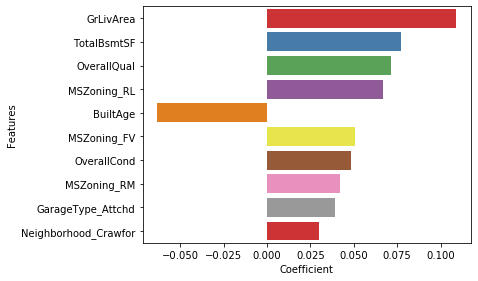

In [88]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## Lasso

In [89]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0005,0.0006,0.0007,0.0008,0.0009, 0.001,0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.00,-0.08,-0.08,1
2,0.00,-0.08,-0.08,2
4,0.00,-0.08,-0.08,3
5,0.00,-0.08,-0.08,4
1,0.00,-0.08,-0.08,5
0,0.00,-0.08,-0.08,6
6,0.01,-0.08,-0.09,7


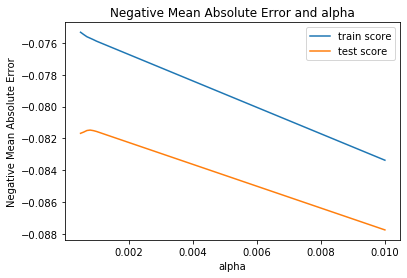

In [91]:


# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [92]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0008)

In [93]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.10332637e-02,  2.12182365e-02,  7.45380470e-02,  4.94787583e-02,
       -2.66366667e-02,  7.74609080e-02,  1.13426030e-01,  1.03573303e-02,
        1.46207952e-02,  2.74817201e-02,  1.07164627e-02, -6.69255940e-02,
       -1.03408252e-02,  9.36777492e-03,  1.23454574e-02,  1.84083712e-02,
        1.64746146e-02,  4.89255084e-02,  1.34195505e-02,  6.48079780e-02,
        3.96953843e-02,  1.59904988e-02,  2.94941748e-02,  1.21288291e-02,
        1.46453059e-02, -2.65157762e-02,  1.73884526e-02, -1.77981957e-03,
       -0.00000000e+00, -0.00000000e+00, -4.47542778e-03,  8.09549555e-03,
       -3.61750318e-05,  1.78839336e-03,  9.35002221e-03,  2.91655375e-03,
        4.84133652e-03,  2.56500274e-02,  3.25293131e-02,  1.66585148e-02,
        2.25071772e-02, -1.00458201e-02, -0.00000000e+00, -0.00000000e+00,
       -1.90065937e-02,  7.41469125e-03,  4.61808114e-03,  5.02086001e-03,
       -0.00000000e+00,  1.35638352e-02])

In [94]:
lasso.intercept_

12.006379152605557

Text(0.5, 0, 'Errors')

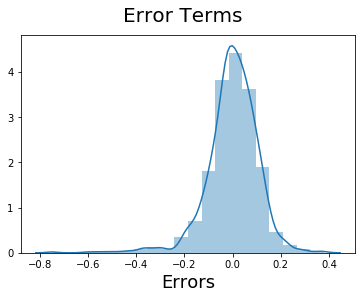

In [95]:
y_train_price = lasso.predict(X_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [96]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train_lasso = sqrt(mean_squared_error(y_train, y_pred_train_lasso))
print('Model RMSE:',rmse_train_lasso)

rmse_test_lasso = sqrt(mean_squared_error(y_test, y_pred_test_lasso))
print('Model RMSE:',rmse_test_lasso)

from sklearn.metrics import r2_score
r2_train_lasso=r2_score(y_train, y_pred_train_lasso)
print('Model Train r2_score:',r2_train_lasso)

from sklearn.metrics import r2_score
r2_test_lasso=r2_score(y_test, y_pred_test_lasso)
print('Model Test r2_score:',r2_test_lasso)

Model RMSE: 0.1070271734662408
Model RMSE: 0.11581859352905328
Model Train r2_score: 0.9224336417908118
Model Test r2_score: 0.9089192998106906


In [98]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.013413946607048064

In [99]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 'AbsCoefficient':abs(lasso.coef_.round(4))})
# = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df_top10=lasso_df.sort_values(by=['AbsCoefficient'], ascending=False).head(10)

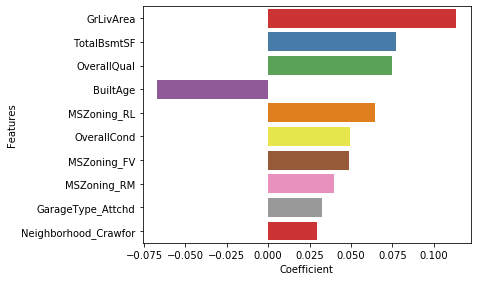

In [100]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df_top10)
plt.show()

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 15
    - Lasso - 0.0008
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.01332090
    - Lasso - 0.01321417

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area
  square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be 
  accomodated in the garage, Total basement area in square feet and the Basement finished square feet area 
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.

## Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Ridge

In [107]:
alpha = 15*2
ridge_new = Ridge(alpha=alpha)

ridge_new.fit(X_train, y_train)

# Making predictions
y_pred_test_ridge_new = ridge_new.predict(X_test)

# Check the mean squared error
mean_squared_error(y_test,y_pred_test_ridge_new)

0.013674654755976815

In [108]:
# Put the shortlisted Features and coefficienst in a dataframe
ridge_df_new = pd.DataFrame({'Features':X_train.columns, 'Coefficient_doubleAlpha':ridge_new.coef_.round(4), 'AbsCoefficient_doubleAlpha':abs(ridge_new.coef_.round(4))})
# = ridge_df[ridge_df['Coefficient'] != 0.00]
ridge_df_new.reset_index(drop=True, inplace=True)
ridge_df_new_top10=ridge_df_new.sort_values(by=['AbsCoefficient_doubleAlpha'], ascending=False).head(10)

ridge_df_new_top10

,Features,Coefficient_doubleAlpha,AbsCoefficient_doubleAlpha
6,GrLivArea,0.104700,0.104700
5,TotalBsmtSF,0.075000,0.075000
2,OverallQual,0.072200,0.072200
11,BuiltAge,-0.059400,0.059400
19,MSZoning_RL,0.048500,0.048500
3,OverallCond,0.047400,0.047400
17,MSZoning_FV,0.040700,0.040700
38,GarageType_Attchd,0.035000,0.035000
22,Neighborhood_Crawfor,0.029900,0.029900
9,GarageArea,0.028800,0.028800


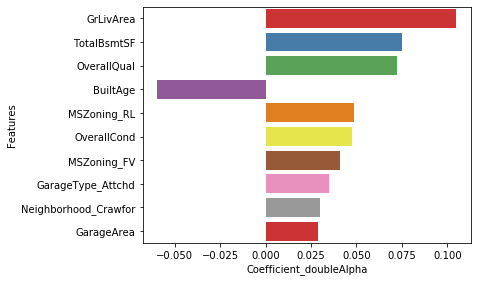

In [109]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient_doubleAlpha', palette='Set1', data = ridge_df_new_top10)
plt.show()

In [110]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
ridge_double=pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_ , 'Coefficient_For_doubleAlpha':ridge_new.coef_,'AbsCoefficient_doubleAlpha':abs(ridge_new.coef_.round(4))})
ridge_double.reset_index(drop=True, inplace=True)
ridge_double_top10=ridge_double.sort_values(by=['AbsCoefficient_doubleAlpha'], ascending=False).head(10)

ridge_double_top10

,Features,Coefficient,Coefficient_For_doubleAlpha,AbsCoefficient_doubleAlpha
6,GrLivArea,0.108799,0.104674,0.104700
5,TotalBsmtSF,0.076966,0.074990,0.075000
2,OverallQual,0.071728,0.072206,0.072200
11,BuiltAge,-0.063123,-0.059390,0.059400
19,MSZoning_RL,0.066719,0.048478,0.048500
3,OverallCond,0.048228,0.047438,0.047400
17,MSZoning_FV,0.050647,0.040737,0.040700
38,GarageType_Attchd,0.038965,0.034976,0.035000
22,Neighborhood_Crawfor,0.029979,0.029888,0.029900
9,GarageArea,0.026979,0.028780,0.028800


In [111]:
r2_test_ridge=r2_score(y_test,y_pred_test_ridge_new)
print('Model Train r2_score (double alpha value):',r2_test_ridge)

Model Train r2_score (double alpha value): 0.9071490914264547


In [112]:
Features_ridge=pd.DataFrame({'Features(alphaOptimal)':X_train.columns, 'Features(alphaDouble)':X_train.columns, 'Coefficient':ridge.coef_ , 'Coefficient_For_doubleAlpha':ridge_new.coef_,'AbsCoefficient_doubleAlpha':abs(ridge_new.coef_.round(4))})
Features_ridge.reset_index(drop=True, inplace=True)
Features_ridge_top10=Features_ridge.sort_values(by=['AbsCoefficient_doubleAlpha'], ascending=False).head(10)

Features_ridge_top10

,Features(alphaOptimal),Features(alphaDouble),Coefficient,Coefficient_For_doubleAlpha,AbsCoefficient_doubleAlpha
6,GrLivArea,GrLivArea,0.108799,0.104674,0.104700
5,TotalBsmtSF,TotalBsmtSF,0.076966,0.074990,0.075000
2,OverallQual,OverallQual,0.071728,0.072206,0.072200
11,BuiltAge,BuiltAge,-0.063123,-0.059390,0.059400
19,MSZoning_RL,MSZoning_RL,0.066719,0.048478,0.048500
3,OverallCond,OverallCond,0.048228,0.047438,0.047400
17,MSZoning_FV,MSZoning_FV,0.050647,0.040737,0.040700
38,GarageType_Attchd,GarageType_Attchd,0.038965,0.034976,0.035000
22,Neighborhood_Crawfor,Neighborhood_Crawfor,0.029979,0.029888,0.029900
9,GarageArea,GarageArea,0.026979,0.028780,0.028800


### Lasso

In [113]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0008*2

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train, y_train) 

# Making predictions
y_pred_test_lasso_new = lasso_new.predict(X_test)

# Check the mean squared error
mean_squared_error(y_test,y_pred_test_lasso_new)

0.013750975244389306

In [114]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df_new = pd.DataFrame({'Features':X_train.columns, 'Coefficient_doubleAlpha':lasso_new.coef_.round(4), 'AbsCoefficient_doubleAlpha':abs(lasso_new.coef_.round(4))})
# = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df_new.reset_index(drop=True, inplace=True)
lasso_df_new_top10=lasso_df_new.sort_values(by=['AbsCoefficient_doubleAlpha'], ascending=False).head(10)

lasso_df_new_top10



,Features,Coefficient_doubleAlpha,AbsCoefficient_doubleAlpha
6,GrLivArea,0.114000,0.114000
2,OverallQual,0.077900,0.077900
5,TotalBsmtSF,0.076100,0.076100
11,BuiltAge,-0.071200,0.071200
3,OverallCond,0.050500,0.050500
9,GarageArea,0.029800,0.029800
22,Neighborhood_Crawfor,0.027900,0.027900
37,Foundation_PConc,0.025500,0.025500
4,BsmtUnfSF,-0.025200,0.025200
17,MSZoning_FV,0.024600,0.024600


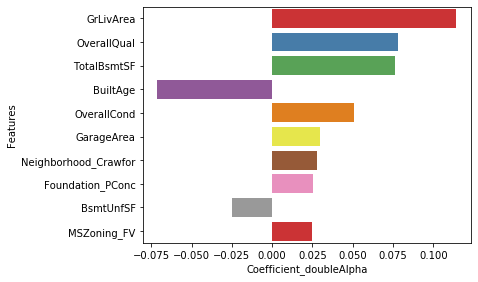

In [115]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient_doubleAlpha', palette='Set1', data = lasso_df_new_top10)
plt.show()

In [116]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
lasso_double=pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_ , 'Coefficient_For_doubleAlpha':lasso_new.coef_,'AbsCoefficient_doubleAlpha':abs(lasso_new.coef_.round(4))})
lasso_double.reset_index(drop=True, inplace=True)
lasso_double_top10=lasso_double.sort_values(by=['AbsCoefficient_doubleAlpha'], ascending=False).head(10)

lasso_double_top10

,Features,Coefficient,Coefficient_For_doubleAlpha,AbsCoefficient_doubleAlpha
6,GrLivArea,0.113426,0.114003,0.114000
2,OverallQual,0.074538,0.077926,0.077900
5,TotalBsmtSF,0.077461,0.076117,0.076100
11,BuiltAge,-0.066926,-0.071210,0.071200
3,OverallCond,0.049479,0.050511,0.050500
9,GarageArea,0.027482,0.029774,0.029800
22,Neighborhood_Crawfor,0.029494,0.027880,0.027900
37,Foundation_PConc,0.025650,0.025497,0.025500
4,BsmtUnfSF,-0.026637,-0.025206,0.025200
17,MSZoning_FV,0.048926,0.024583,0.024600


In [117]:
r2_test_lasso=r2_score(y_test,y_pred_test_lasso_new)
print('Model Train r2_score (double alpha value):',r2_test_lasso)

Model Train r2_score (double alpha value): 0.9066308752946157


In [118]:
Features_ridge=pd.DataFrame({'Features(alphaOptimal)':X_train.columns, 'Features(alphaDouble)':X_train.columns, 'Coefficient':lasso.coef_ , 'Coefficient_For_doubleAlpha':lasso_new.coef_,'AbsCoefficient_doubleAlpha':abs(lasso_new.coef_.round(4))})


In [119]:
Features_lasso=pd.DataFrame({'Features(alphaOptimal)':X_train.columns, 'Features(alphaDouble)':X_train.columns, 'Coefficient':lasso.coef_ , 'Coefficient_For_doubleAlpha':lasso_new.coef_,'AbsCoefficient_doubleAlpha':abs(lasso_new.coef_.round(4))})
Features_lasso.reset_index(drop=True, inplace=True)
Features_lasso_top10=Features_lasso.sort_values(by=['AbsCoefficient_doubleAlpha'], ascending=False).head(10)

Features_lasso_top10

,Features(alphaOptimal),Features(alphaDouble),Coefficient,Coefficient_For_doubleAlpha,AbsCoefficient_doubleAlpha
6,GrLivArea,GrLivArea,0.113426,0.114003,0.114000
2,OverallQual,OverallQual,0.074538,0.077926,0.077900
5,TotalBsmtSF,TotalBsmtSF,0.077461,0.076117,0.076100
11,BuiltAge,BuiltAge,-0.066926,-0.071210,0.071200
3,OverallCond,OverallCond,0.049479,0.050511,0.050500
9,GarageArea,GarageArea,0.027482,0.029774,0.029800
22,Neighborhood_Crawfor,Neighborhood_Crawfor,0.029494,0.027880,0.027900
37,Foundation_PConc,Foundation_PConc,0.025650,0.025497,0.025500
4,BsmtUnfSF,BsmtUnfSF,-0.026637,-0.025206,0.025200
17,MSZoning_FV,MSZoning_FV,0.048926,0.024583,0.024600


# Question 3 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now


In [120]:
X=df_q3.drop(['SalePrice','GrLivArea','BuiltAge','OverallQual','TotalBsmtSF','MSZoning_RL'],axis=1)
y=df_q3['SalePrice']

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [123]:
lm = LinearRegression()
lm.fit(X_train,y_train)

#running RFE

rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)

# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallCond,True,1
2,MasVnrArea,True,1
3,BsmtFinSF1,True,1
4,BsmtUnfSF,True,1
5,BsmtFullBath,True,1
6,FullBath,True,1
7,HalfBath,True,1
8,BedroomAbvGr,True,1
9,Fireplaces,True,1


In [124]:
df_q3.shape

(1386, 131)

In [125]:
# list of alphas

params = {'alpha': [0.0005,0.0006,0.0007,0.0008,0.0009, 0.001,0.01]}

# cross validation

folds = 5
lasso_model_cv_q3 = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_q3.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0008),
             param_grid={'alpha': [0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.000800,-0.075699,-0.081473,1
2,0.000700,-0.075609,-0.081500,2
4,0.000900,-0.075790,-0.081508,3
5,0.001000,-0.075887,-0.081562,4
1,0.000600,-0.075471,-0.081597,5
0,0.000500,-0.075325,-0.081677,6
6,0.010000,-0.083367,-0.087747,7


In [127]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0008)

In [129]:
alpha = 0.0008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.51772717e-02,  2.71507570e-02,  4.19156413e-02,  1.45330281e-02,
        6.39027015e-02,  5.42875733e-02,  2.07750794e-02,  5.71247433e-02,
        3.70224216e-02,  1.67496973e-02,  1.55765134e-02,  4.80039977e-02,
        1.32186899e-02,  1.46803391e-02, -1.38825270e-03, -1.60405725e-02,
        6.32610265e-03,  1.72159594e-02,  2.68461148e-02,  1.52469884e-02,
        1.11970319e-02,  1.65106450e-02,  3.11381086e-02,  2.38198657e-02,
        4.94451765e-03,  6.59634330e-03, -3.21346331e-03,  1.22741471e-02,
        1.04678870e-03, -6.18728480e-03,  0.00000000e+00,  2.88508953e-03,
        5.42266961e-03,  2.61033731e-02, -1.69001605e-02, -4.39109745e-03,
       -3.00731031e-02, -2.86592838e-02, -5.56285443e-03, -1.32033150e-03,
       -2.41799875e-04, -3.09400212e-03,  1.59428102e-02,  2.49811863e-02,
       -2.78604601e-02, -4.49325616e-03, -5.10612347e-03,  2.78643830e-03,
        1.08432078e-02,  2.88065290e-02,  4.19869300e-03,  8.99725237e-03,
       -0.00000000e+00,  

In [130]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

rmse_train_lasso = sqrt(mean_squared_error(y_train, y_pred_train_lasso))
print('Model RMSE:',rmse_train_lasso)

rmse_test_lasso = sqrt(mean_squared_error(y_test, y_pred_test_lasso))
print('Model RMSE:',rmse_test_lasso)


r2_train_lasso=r2_score(y_train, y_pred_train_lasso)
print('Model Train r2_score:',r2_train_lasso)


r2_test_lasso=r2_score(y_test, y_pred_test_lasso)
print('Model Test r2_score:',r2_test_lasso)

Model RMSE: 0.11967309530907166
Model RMSE: 0.14467281588096753
Model Train r2_score: 0.9030208579949305
Model Test r2_score: 0.8578837771273017


In [134]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 'AbsCoefficient':abs(lasso.coef_.round(4))})
# = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df_top5=lasso_df.sort_values(by=['AbsCoefficient'], ascending=False).head(5)

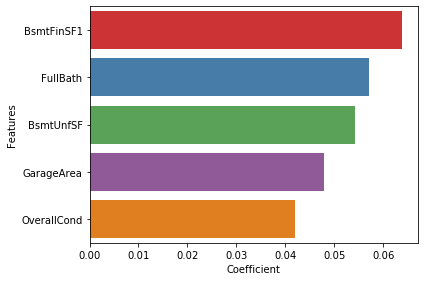

In [135]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df_top5)
plt.show()

In [136]:
lasso_df_top5

,Features,Coefficient,AbsCoefficient
4,BsmtFinSF1,0.063900,0.063900
7,FullBath,0.057100,0.057100
5,BsmtUnfSF,0.054300,0.054300
11,GarageArea,0.048000,0.048000
2,OverallCond,0.041900,0.041900


In [137]:
lasso_df_top10['Features']

4      BsmtFinSF1
7        FullBath
5       BsmtUnfSF
11     GarageArea
2     OverallCond
Name: Features, dtype: object